### Визуализация сезонных трендов в кластерах

In [1]:
import os

import pandas as pd
import numpy as np

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = '/home/pavel/P/kaggle_data/expedia'

In [3]:
train_dtypes = {'site_name': np.int8, 'posa_continent': np.int8, 
                'user_location_country': np.int16, 'user_location_region': np.int16, 
                'user_location_city': np.int32, 'orig_destination_distance': np.float64, 
                'user_id': np.int32, 'is_mobile': np.bool, 'is_package': np.bool,
                'channel': np.int8, 'srch_adults_cnt': np.int8, 'srch_children_cnt': np.int8,
                'srch_rm_cnt': np.int8, 'srch_destination_id': np.int32, 
                'srch_destination_type_id': np.int8, 'is_booking': np.bool, 
                'cnt': np.int16, 'hotel_continent': np.int8, 'hotel_country': np.int16, 
                'hotel_market': np.int16, 'hotel_cluster': np.int8}

train = pd.read_csv(os.path.join(data_dir, 'train.csv'),
                    dtype=train_dtypes,
                    usecols=['date_time', 'hotel_cluster', 'is_booking'])

#### Посмотрим на самый популярный кластер - 91

In [34]:
cluster_91 = train[train['hotel_cluster']==91]

In [35]:
cluster_91['date'] = pd.to_datetime(cluster_91.date_time, errors='raise')
cluster_91 = cluster_91.drop(['date_time'], axis=1)

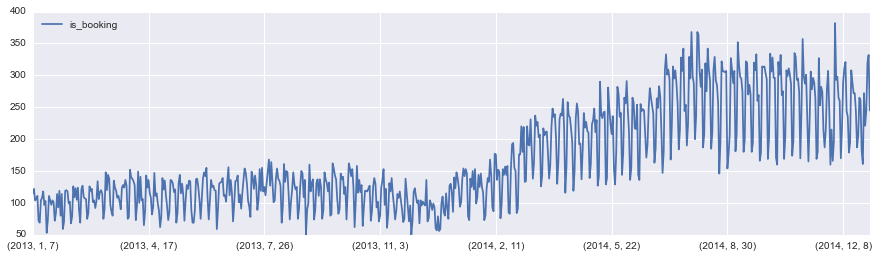

In [71]:
times = pd.DatetimeIndex(cluster_91.date)
grouped = cluster_91.groupby([times.year, times.month, times.day]).agg({'is_booking': 'sum'})
grouped.plot(figsize=(15, 4))